In [1]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Random params
np.random.seed(0)
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## Load train and test
test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')

scl = MinMaxScaler()
scl.fit_transform(dT)
scld_dT = pd.DataFrame(scl.transform(dT))
scld_dT.index = dT.index
scld_dT.columns = dT.columns

stats = dT.describe()
statsTarget = stats.pop('claim')
stats = stats.transpose()

scld_stats = scld_dT.describe()
scld_stats = scld_stats.transpose()

C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


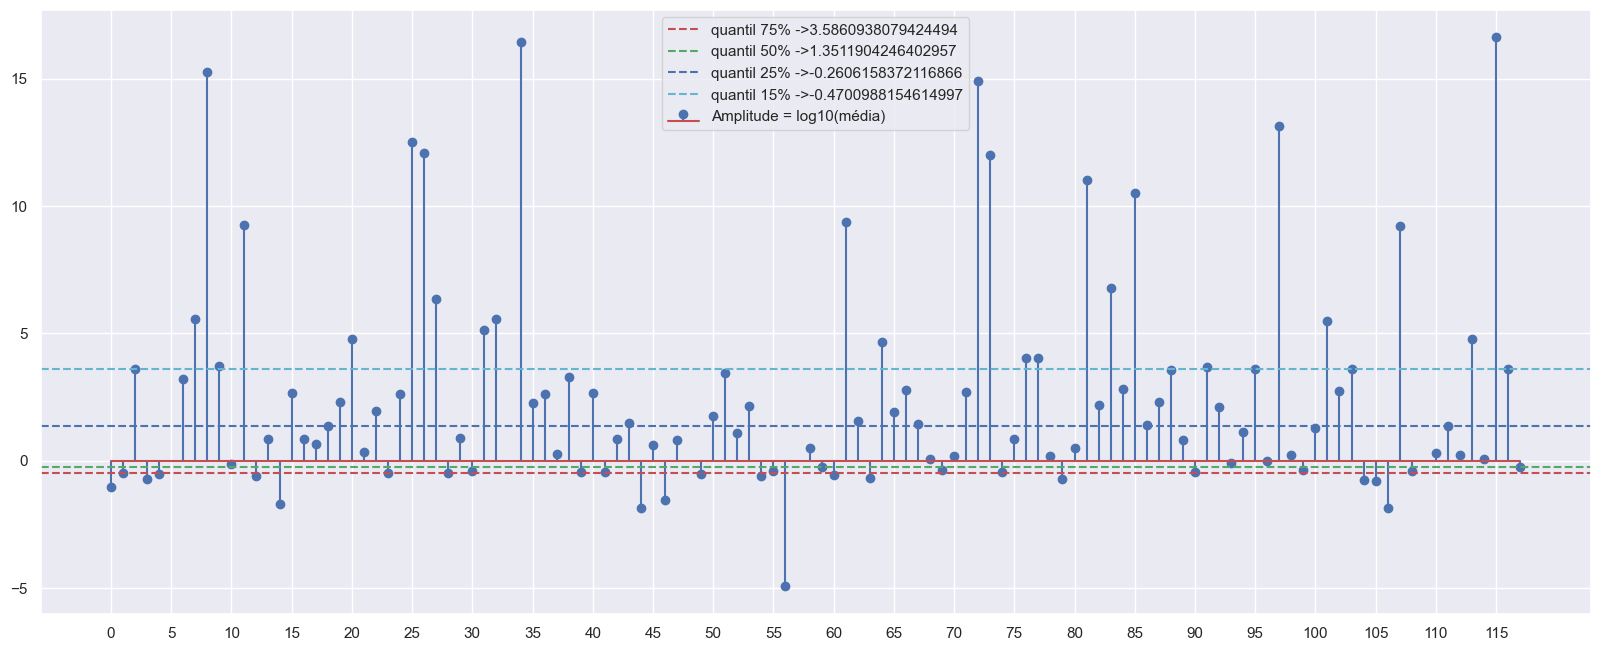

In [2]:
# Qual a escala de cada feature?
plt.stem(np.log10(stats['mean']));
plt.xticks(np.arange(0,len(stats['mean']),5));
amplitude = pd.DataFrame(np.log10(stats['mean']))
q = amplitude.quantile([0.15,0.25,0.5,0.75])


plt.axhline(y = q.iloc[0].values[0],linestyle = '--',color ='r')
plt.axhline(y = q.iloc[1].values[0],linestyle = '--',color ='g')
plt.axhline(y = q.iloc[2].values[0],linestyle = '--',color ='b')
plt.axhline(y = q.iloc[3].values[0],linestyle = '--',color = 'c')

l1 = 'quantil 15% ->' +str(q.iloc[0].values[0])
l2 = 'quantil 25% ->' +str(q.iloc[1].values[0])
l3 = 'quantil 50% ->' +str(q.iloc[2].values[0])
l4 = 'quantil 75% ->' +str(q.iloc[3].values[0])

# plt.legend(['Amplitude = log10(média)',l1,l2,l3,l4])
plt.legend([l4,l3,l2,l1,'Amplitude = log10(média)'])

# plt.xticks(np.arange(len(stats['mean'])),stats.index);

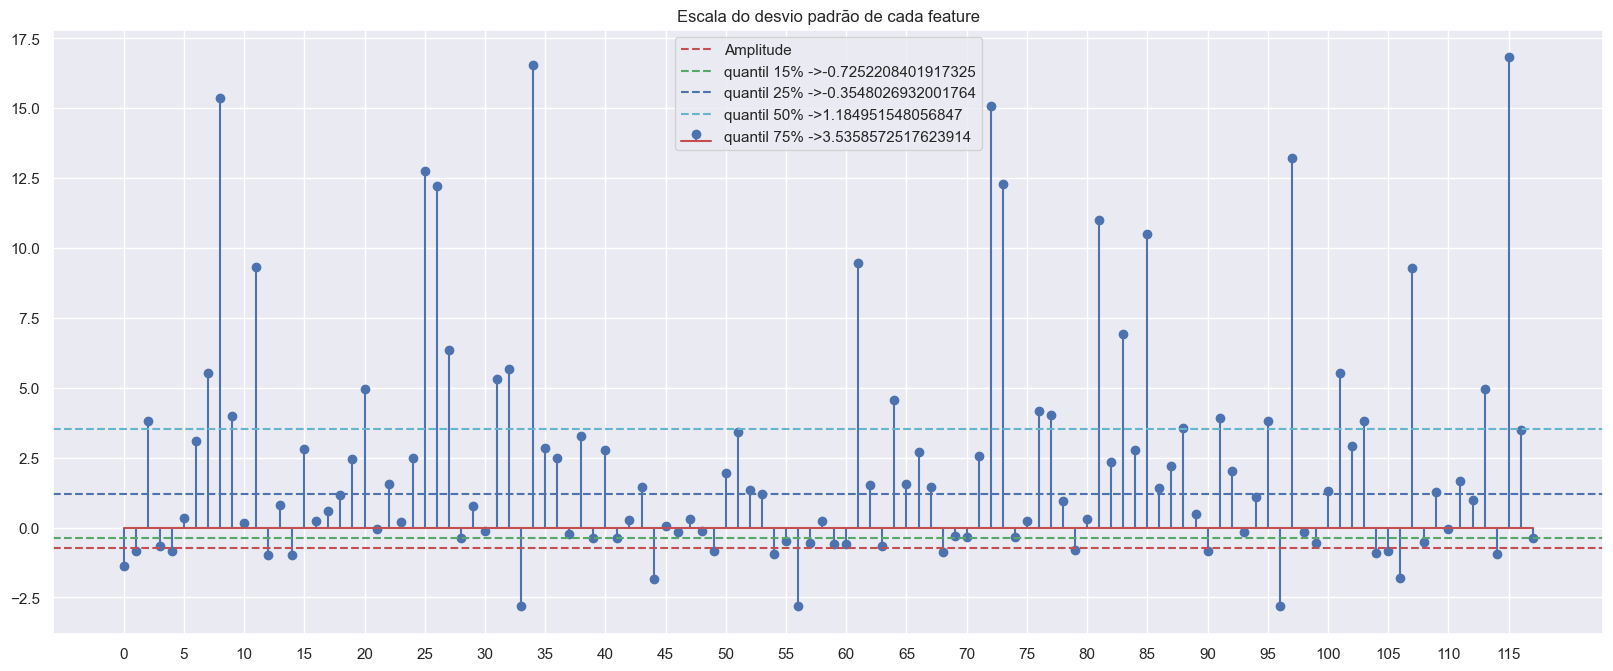

In [3]:
# Qual a escala do desvio padrão de cada feature?
plt.stem(np.log10(stats['std']));
plt.xticks(np.arange(0,len(stats['std']),5));
amplitude = pd.DataFrame(np.log10(stats['std']))
q = amplitude.quantile([0.15,0.25,0.5,0.75])

plt.axhline(y = q.iloc[0].values[0],linestyle = '--',color ='r');
plt.axhline(y = q.iloc[1].values[0],linestyle = '--',color ='g');
plt.axhline(y = q.iloc[2].values[0],linestyle = '--',color ='b');
plt.axhline(y = q.iloc[3].values[0],linestyle = '--',color = 'c');

l1 = 'quantil 15% ->' +str(q.iloc[0].values[0])
l2 = 'quantil 25% ->' +str(q.iloc[1].values[0])
l3 = 'quantil 50% ->' +str(q.iloc[2].values[0])
l4 = 'quantil 75% ->' +str(q.iloc[3].values[0])

plt.legend(['Amplitude',l1,l2,l3,l4]);
plt.title('Escala do desvio padrão de cada feature');


# plt.xticks(np.arange(len(stats['mean'])),stats.index);

In [4]:
# Há features constantes?
# plt.stem(np.log10(stats['std']));
# plt.xticks(np.arange(0,len(stats['std']),5));
# np.log10(stats['std'])
# (stats['std']/np.log10(stats['std'])).describe()
stats['std_over_mean'] = stats['std']/stats['mean']
stats['rounded_std_over_mean'] = round(stats['std']/stats['mean'],2)
stats['log10std_over_log10mean'] = np.log10(stats['std'])/np.log10(stats['mean'])

# print(stats['std_over_mean'].describe())
# print('\n Cleaner:')
# print((abs(stats.loc[abs(stats['std_over_mean']) <= 2]['std_over_mean'])).describe())

print(stats.loc[abs(stats['rounded_std_over_mean']) <= 0.4]['rounded_std_over_mean'].sort_values(ascending=True))


# stats.loc[stats['std_over_mean'] <= 0].count()
# plt.stem(np.log10(abs(stats['std_over_mean'])))
# plt.stem(abs(stats.loc[abs(stats['std_over_mean']) <= 2]['std_over_mean']))


# print('\n Regular:')
# print(stats['std'].describe())
# print('\n Scaled:')
# print(scld_stats['std'].describe())

f97     0.00
f115    0.10
f69     0.11
f54     0.12
f17     0.25
f76     0.25
f43     0.26
f46     0.27
f71     0.29
f38     0.33
f48     0.33
f22     0.39
f91     0.40
Name: rounded_std_over_mean, dtype: float64


C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


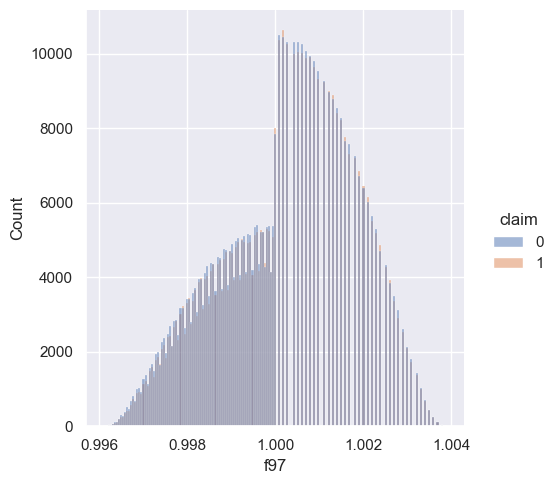

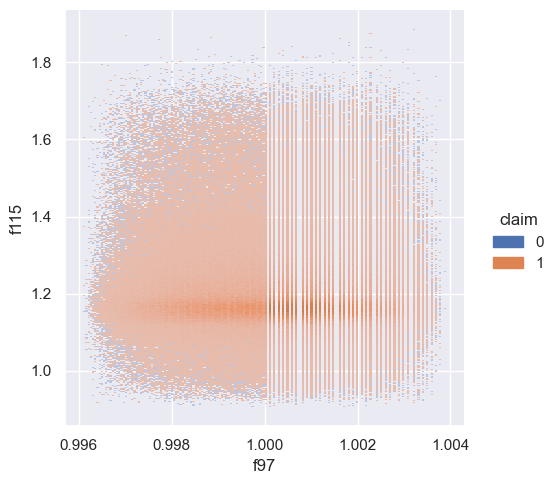

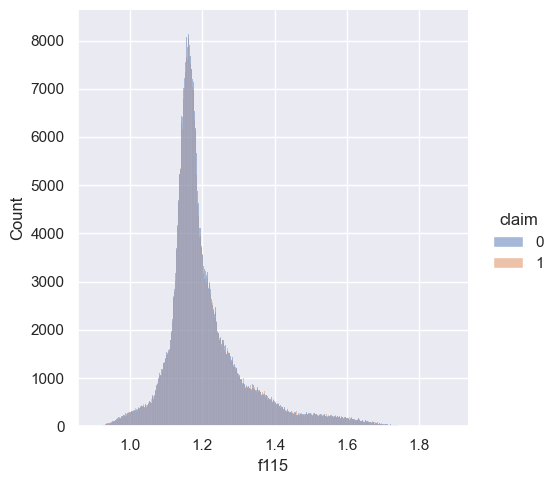

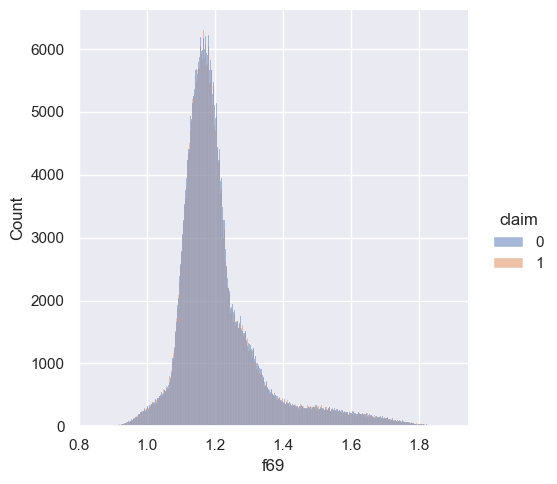

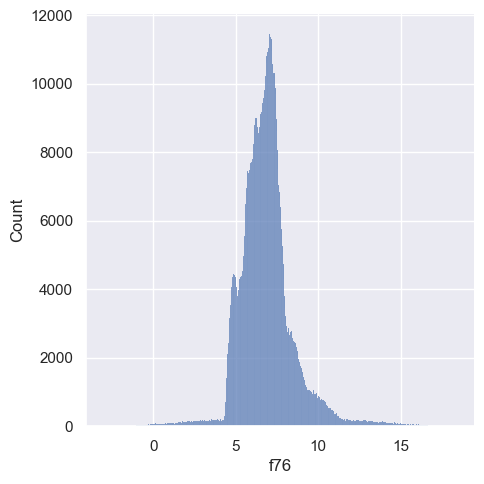

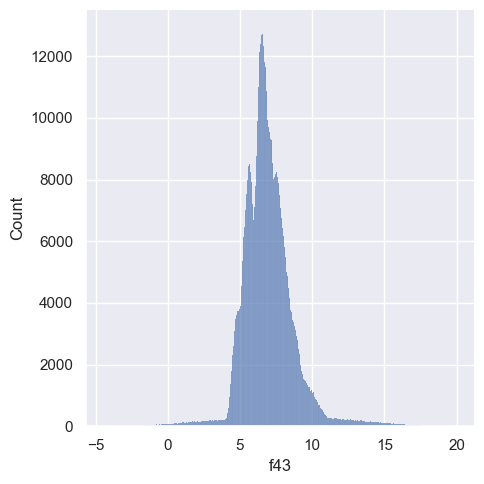

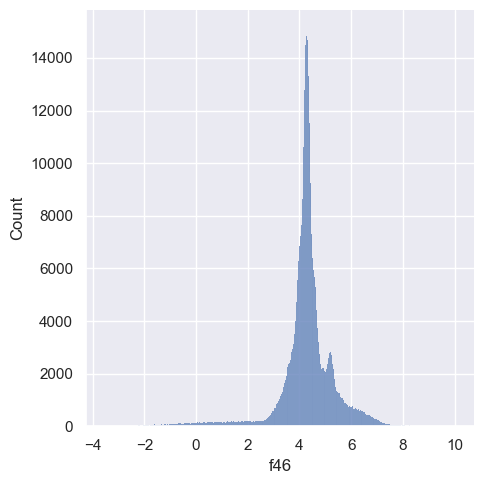

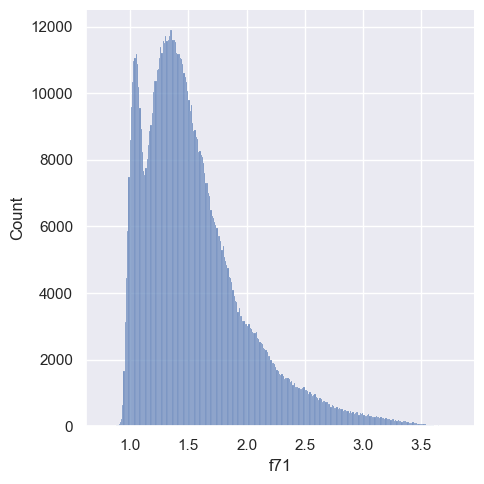

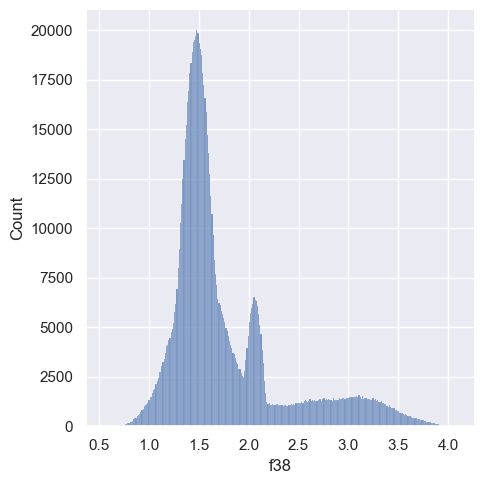

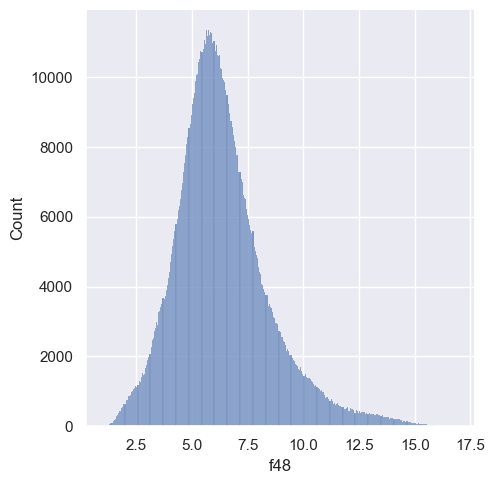

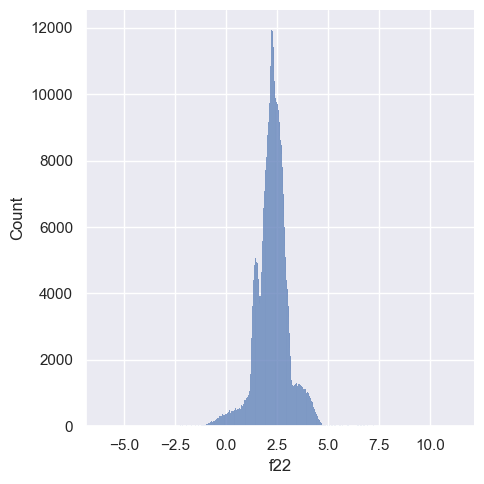

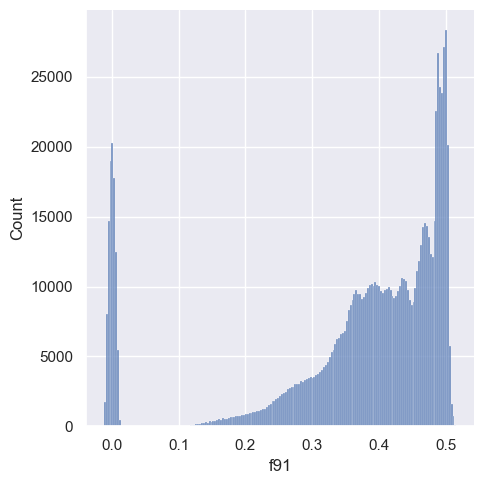

In [21]:
sns.displot(data = dT, x = 'f97', hue = 'claim')
sns.displot(data = dT, x = 'f97', y = 'f115', hue = 'claim')
sns.displot(data = dT, x = 'f115', hue = 'claim')
sns.displot(data = dT, x = 'f69', hue = 'claim')
# sns.displot(data = dT['f54'], hue = 'claim')
# sns.displot(data = dT['f17'], hue = 'claim')
sns.displot(data = dT['f76'])
sns.displot(data = dT['f43'])
sns.displot(data = dT['f46'])
sns.displot(data = dT['f71'])
sns.displot(data = dT['f38'])
sns.displot(data = dT['f48'])
sns.displot(data = dT['f22'])
sns.displot(data = dT['f91'])

In [6]:
print(stats.loc[stats['rounded_std_over_mean'] < 0]['rounded_std_over_mean'].sort_values(ascending=True))

f34    -330.90
f6      -29.72
f49      -1.71
f110     -0.93
f58      -0.85
Name: rounded_std_over_mean, dtype: float64


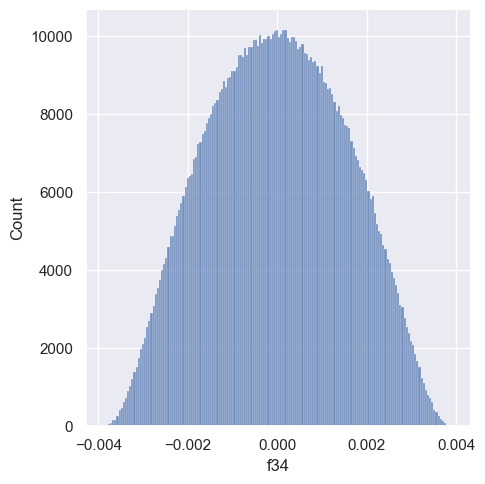

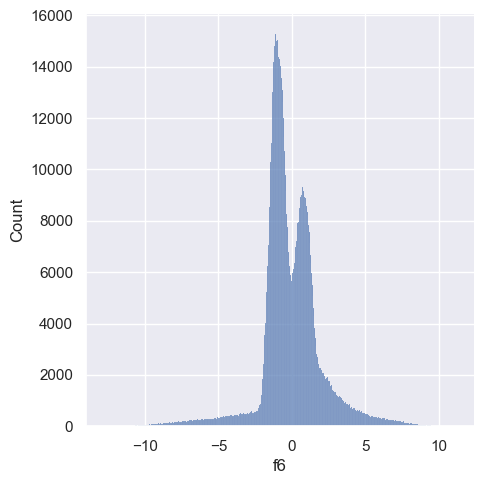

In [7]:
# Very negative variance:
sns.displot(data = dT['f34'])
sns.displot(data = dT['f6'])

In [8]:
print(stats.loc[stats['rounded_std_over_mean'] > 2]['rounded_std_over_mean'].sort_values(ascending=True))

f11       2.05
f36       3.78
f24       4.82
f15       5.25
f113      5.77
f79       5.84
f47      23.16
f57     129.37
Name: rounded_std_over_mean, dtype: float64


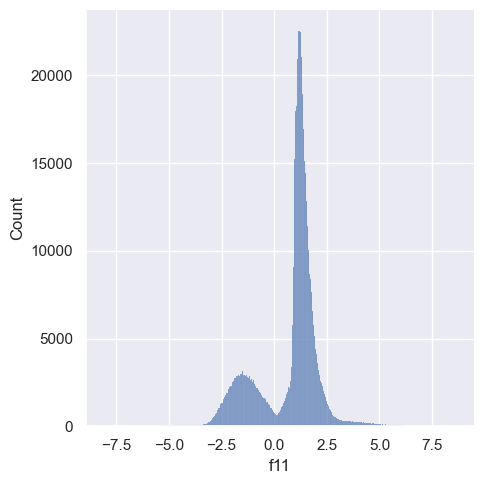

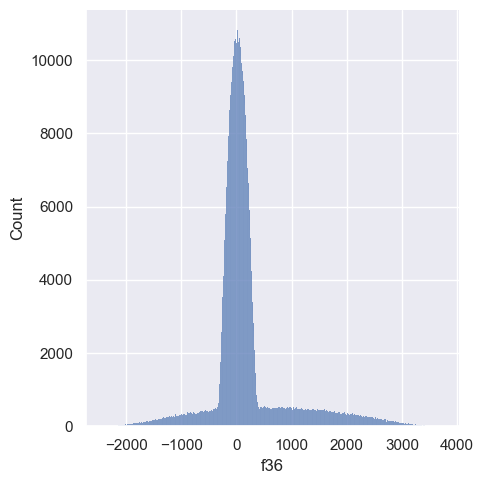

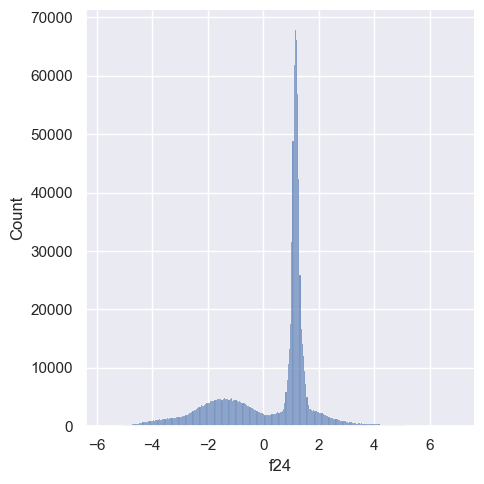

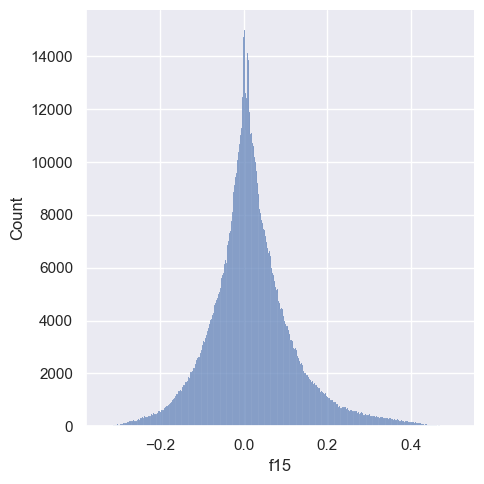

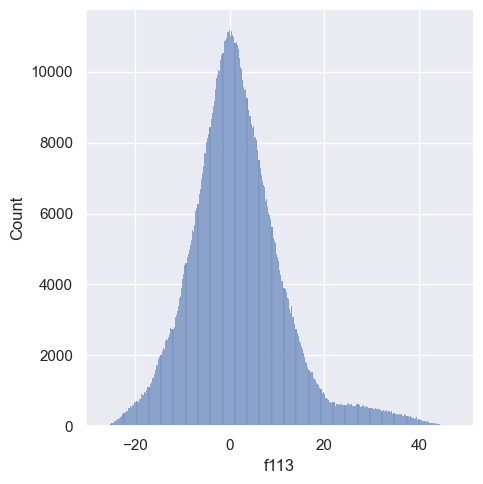

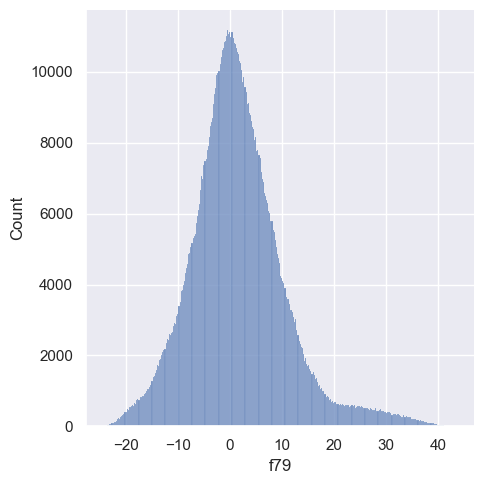

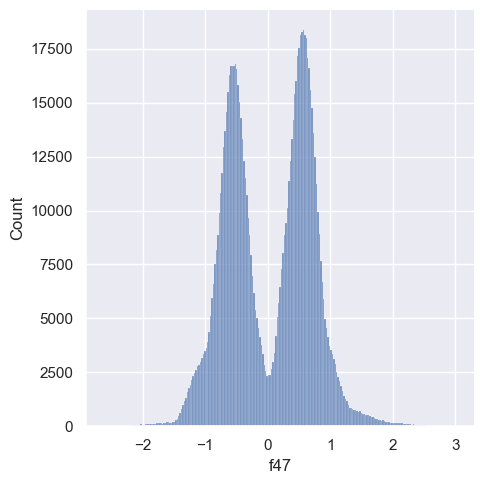

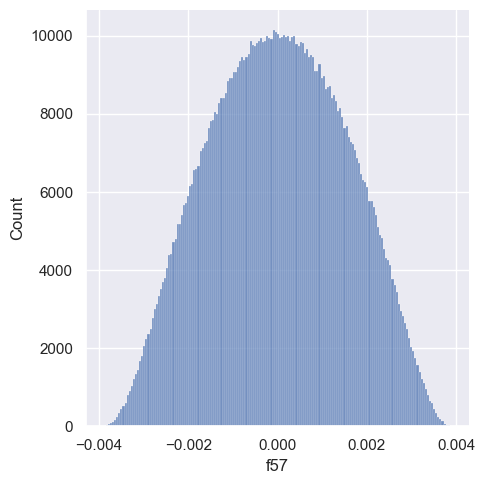

In [9]:
# Very positive variance:
sns.displot(data = dT['f11'])
sns.displot(data = dT['f36'])
sns.displot(data = dT['f24'])
sns.displot(data = dT['f15'])
sns.displot(data = dT['f113'])
sns.displot(data = dT['f79'])
sns.displot(data = dT['f47'])
sns.displot(data = dT['f57'])

In [10]:
print('[       abs(sigma/mu) <= 0.4 ]:',stats.loc[abs(stats['rounded_std_over_mean']) <= 0.4]['rounded_std_over_mean'].count())
print('[0.4 <= abs(sigma/mu) <= 1   ]:',stats.loc[abs(stats['rounded_std_over_mean']) < 1].loc[abs(stats['rounded_std_over_mean']) > 0.4]['rounded_std_over_mean'].count())
print('[1   <= abs(sigma/mu) < 2    ]:',stats.loc[abs(stats['rounded_std_over_mean']) >= 1].loc[abs(stats['rounded_std_over_mean']) < 2]['rounded_std_over_mean'].count())

print(' \n ~ \n')
print('[           sigma/mu  > 0   ]:',stats.loc[stats['rounded_std_over_mean'] < 0]['rounded_std_over_mean'].count())
print('[2   <=     sigma/mu        ]:',stats.loc[stats['rounded_std_over_mean'] >= 2]['rounded_std_over_mean'].count())

[       abs(sigma/mu) <= 0.4 ]: 13
[0.4 <= abs(sigma/mu) <= 1   ]: 52
[1   <= abs(sigma/mu) < 2    ]: 43
 
 ~ 

[           sigma/mu  > 0   ]: 5
[2   <=     sigma/mu        ]: 8


([<matplotlib.axis.YTick at 0x1b705662670>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

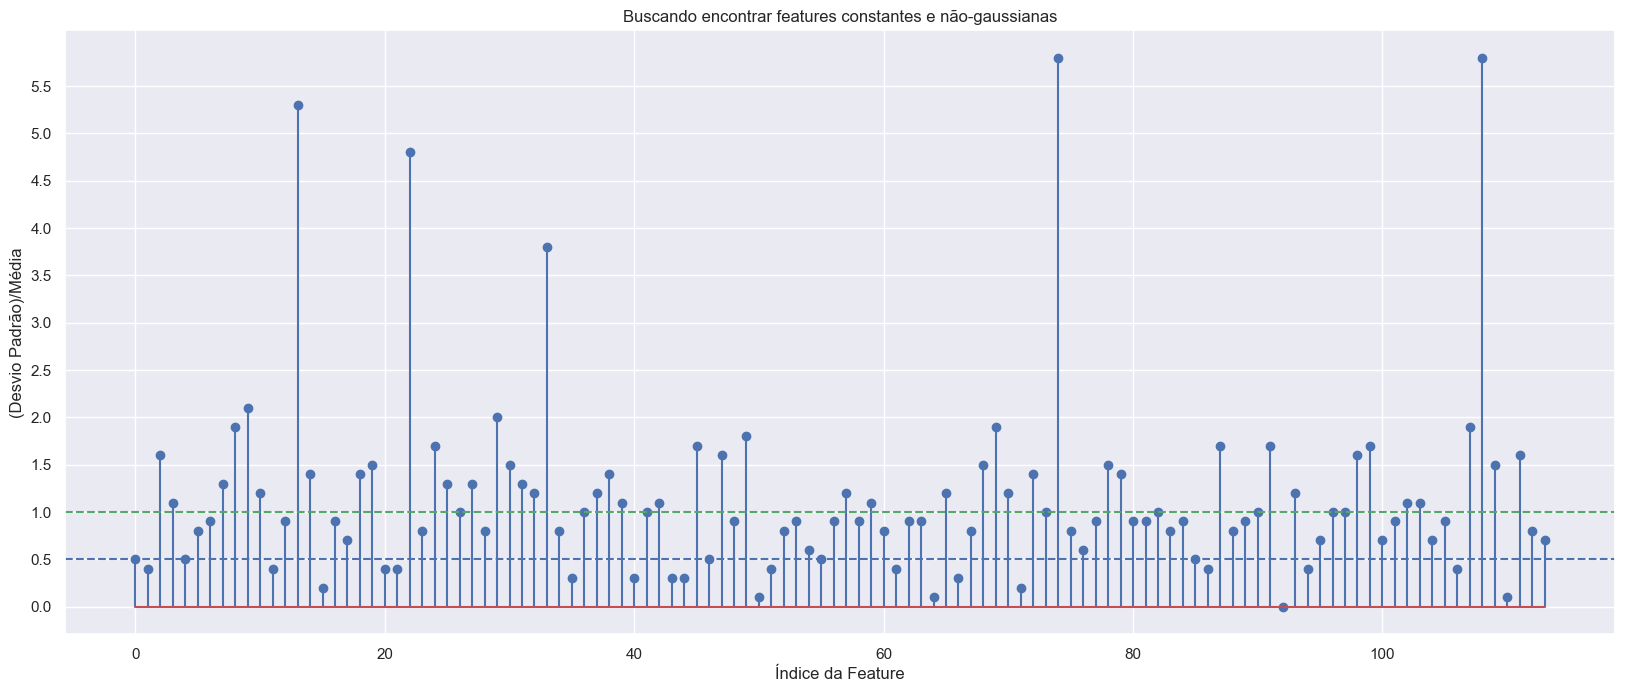

In [11]:
plt.rcParams['figure.figsize'] = [20, 8]
stats['OVERrounded_std_over_mean'] = round(stats['std']/stats['mean'],1)
# plt.stem(stats.loc[abs(stats['OVERrounded_std_over_mean'])<= 10]['OVERrounded_std_over_mean'].index,abs(stats.loc[abs(stats['OVERrounded_std_over_mean'])<= 10]['OVERrounded_std_over_mean']))
plt.stem(abs(stats.loc[abs(stats['OVERrounded_std_over_mean'])<= 10]['OVERrounded_std_over_mean']))

plt.axhline(y = 1,linestyle = '--',color ='g');
plt.axhline(y = 0.5,linestyle = '--',color ='b');


l1 = 'x < 0.5 ('+str(round(stats.loc[stats['OVERrounded_std_over_mean']<= 0.5]['OVERrounded_std_over_mean'].count()/stats.count()[0],2)*100)+'%)'
l2 = '0.5 < x < 1 ('+str(round(stats.loc[stats['OVERrounded_std_over_mean']> 0.5].loc[stats['OVERrounded_std_over_mean']<1]['OVERrounded_std_over_mean'].count()/stats.count()[0],2)*100)+'%)'
l3 = '1 < x ('+str(round(stats.loc[stats['OVERrounded_std_over_mean']> 1]['OVERrounded_std_over_mean'].count()/stats.count()[0],2)*100)+'%)'
# l2 = 'quantil 25% ->' +str(q.iloc[1].values[0])

plt.title('Buscando encontrar features constantes e não-gaussianas');
plt.xlabel('Índice da Feature');
plt.ylabel('(Desvio Padrão)/Média');
plt.yticks(np.arange(0,6,0.5))
# plt.legend([l1,l2,l3]);

In [12]:
stats['OVERrounded_std_over_mean'].describe()

count    118.000000
mean      -0.712712
std       33.057726
min     -330.900000
25%        0.525000
50%        0.900000
75%        1.400000
max      129.400000
Name: OVERrounded_std_over_mean, dtype: float64

In [13]:
stats['rounded_std_over_mean'].describe()

count    118.000000
mean      -0.715339
std       33.056404
min     -330.900000
25%        0.510000
50%        0.940000
75%        1.387500
max      129.370000
Name: rounded_std_over_mean, dtype: float64

In [14]:
stats['std_over_mean'].describe()

count    118.000000
mean      -0.715677
std       33.056014
min     -330.896915
25%        0.508645
50%        0.942713
75%        1.386777
max      129.365811
Name: std_over_mean, dtype: float64

In [15]:
stats['log10std_over_log10mean'].describe()

count       113.000000
mean       1937.373048
std       20586.712224
min         -11.403734
25%           0.861943
50%           0.997523
75%           1.062275
max      218840.490029
Name: log10std_over_log10mean, dtype: float64

In [16]:
print(stats.loc[abs(stats['OVERrounded_std_over_mean'])> 2]['OVERrounded_std_over_mean'].count())
print(stats.loc[stats['OVERrounded_std_over_mean']< 0]['OVERrounded_std_over_mean'].count())

10
5


In [17]:
print('Os da meiuca:')
print(stats.loc[abs(stats['OVERrounded_std_over_mean'])> 1].loc[abs(stats['OVERrounded_std_over_mean'])< 2]['OVERrounded_std_over_mean'].count())
print(stats.loc[abs(stats['OVERrounded_std_over_mean'])>= 0.5].loc[abs(stats['OVERrounded_std_over_mean'])<=1]['OVERrounded_std_over_mean'].count())
print(stats.loc[abs(stats['OVERrounded_std_over_mean'])< 0.5]['OVERrounded_std_over_mean'].count())

Os da meiuca:
40
47
20
